本例综合演示折线图绘制、直线拟合以及间接测量量误差分析的使用方法。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sympy import *
from scipy.stats import norm
from sklearn.metrics import r2_score
from scipy.stats import t
from scipy.optimize import curve_fit
from ExpDataAnalysis import ExpDataAnalysis as EDA
from pynverse import inversefunc

In [145]:
T=np.array([[41.0,61.0,81.0,91.0,101.0,111.0]])
RT=np.array([[49,87,143,177,210,237]])
WT=np.array([[0.60,1.4,2.5,2.7,3.2,3.8]])
S=np.array([[401,361,321,301,281,261,241,221,201,191,181,171,161,151,121,91,61,51,41,31,21]])*1.0
RS=np.array([[69,80,96,104,114,131,147,174,210,223,247,275,309,345,543,905,1775,2346,3153,4015,4430]])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$T^4$/K$^4$', ylabel='P/$\\mu$V'>,
 array([ 1.61051149e-08, -1.09586115e+02]),
 array([4.04242308e-10, 6.73446736e+00]),
 array([ 2.97963127, 17.6245189 ,  0.5763268 , 11.50185679, 15.83220614,
        17.13340353]),
 0.9974862459676929)

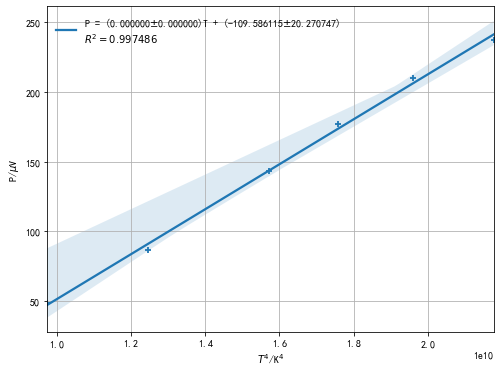

In [143]:
EDA(RT,(T+273.15)**4).LinearfitPlot(xname='T',yname='P',xlabel='$T^4$/K$^4$',ylabel='P/$\mu$V',FileAdress=r'E:\Latex\FE 3\CC1\P-T.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$T^4$/K$^4$', ylabel='W/W'>,
 array([ 2.61318067e-10, -1.85343367e+00]),
 array([1.36665317e-11, 2.27677336e-01]),
 array([8.41651976e-03, 1.97842216e-05, 5.89075109e-02, 1.73231760e-03,
        4.56148001e-03, 1.39571791e-03]),
 0.9891778850320629)

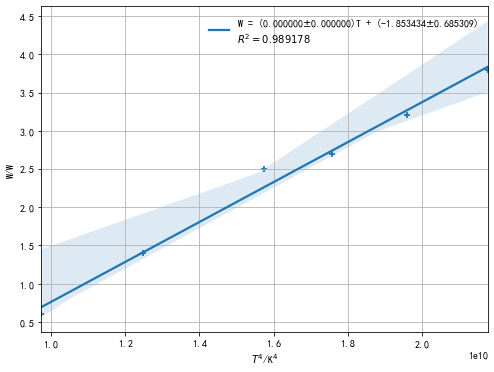

In [148]:
EDA(WT,(T+273.15)**4).LinearfitPlot(xname='T',yname='W',xlabel='$T^4$/K$^4$',ylabel='W/W',FileAdress=r'E:\Latex\FE 3\CC1\W-T.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$T^4$/K$^4$', ylabel='W/W'>,
 array([ 2.62534390e-10, -1.92171998e+00]),
 array([3.73573052e-12, 6.29062859e-02]),
 array([1.24622960e-03, 2.36919014e-03, 2.78486987e-05, 5.33071631e-04,
        1.97030116e-05]),
 0.9993929335821571)

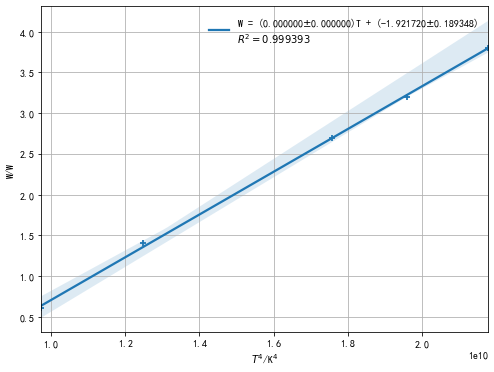

In [158]:
T1=np.array([[41.0,61.0,91.0,101.0,111.0]])
WT1=np.array([[0.60,1.4,2.7,3.2,3.8]])
EDA(WT1,(T1+273.15)**4).LinearfitPlot(xname='T',yname='W',xlabel='$T^4$/K$^4$',ylabel='W/W',FileAdress=r'E:\Latex\FE 3\CC1\W-T1.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:>,
 array([60.87980769,  6.41778846]),
 array([ 3.88290063, 10.09305229]),
 array([ 36.65487449,  21.61802908, 243.90029956,  38.52350684,
         76.8572543 ,   0.57920881]),
 0.9839890803133418)

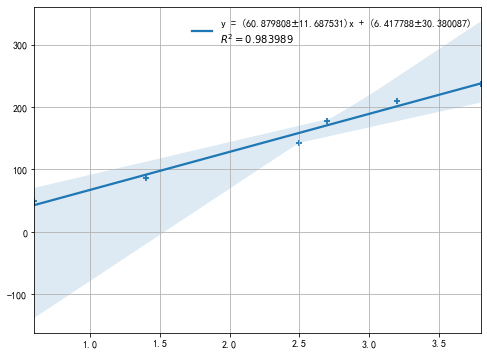

In [59]:
EDA(RT,PT).LinearfitPlot()

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='s/mm', ylabel='P/$\\mu$V'>)

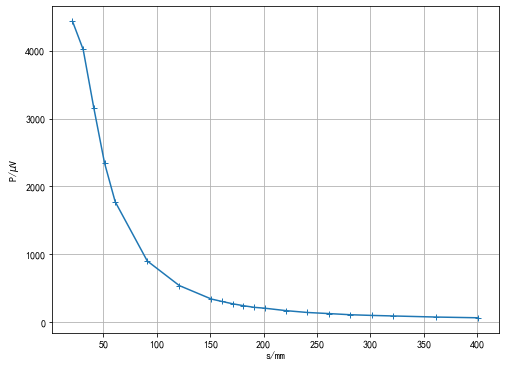

In [162]:
EDA(RS,S).Plot(xlabel='s/mm',ylabel='P/$\mu$V',FileAdress=r'E:\Latex\FE 3\CC1\P-s.png')

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$s^{-2}$/mm$^{-2}$', ylabel='P/$\\mu$V'>)

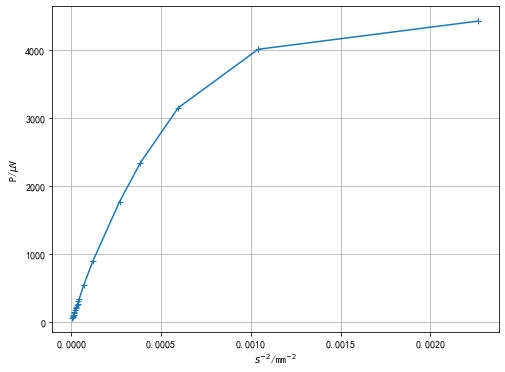

In [163]:
EDA(RS,S**(-2)).Plot(xlabel='$s^{-2}$/mm$^{-2}$',ylabel='P/$\mu$V',FileAdress=r'E:\Latex\FE 3\CC1\P-s1.png')

In [128]:
def func0(L):
    a,b=L
    return (-b/a)**(1/4)
EDA(np.array([[]])).UncertaintyReport(exData=np.array([[1.61051149e-08,-1.09586115e+02],[4.04242308e-10,6.73446736e+00],[4,4]]),func=func0)

各平均值为:
[nan]
各测量列的标准差为:
[-0.]
各平均值的标准差为:
[nan]
各测量列的自由度为:
[-1.]
间接测量量： 287.2089212594232
所有参数为: a,b
{a: 4.04242308e-10, b: 6.73446736}
传递系数和各项标准不确定度：
aa = -0.25*(-b/a)**0.25/a = -4458349459.82632
u1 =aa*ua = -1.80225347551074
ab = 0.25*(-b/a)**0.25/b = -0.655212846215561
u2 =ab*ub = -4.41250952669140
合成标准不确定度u = 4.76637786092677
各自由度分量:
νa = 4.0
νb = 4.0
合成自由度ν = 5.29846103442689
包含因子k = 5.292008692628428
不确定度报告：
\begin{equation}
X=\bar{X}\pm U_{X}\approx(287.208921\pm 25.223713)
\end{equation} 
其中展伸不确定度$U_{X}={k}\times{u_{X}}\approx25.223713$，是由合成标准不确定度$u_{X}\approx4.766378$和包含因子$k\approx5.292009$确定的，k是依据置信概率$P=99.73\%$和自由度$\nu\approx5.30$查t分布表得到的。


D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
E:\Python\Physics\Fudermental Experiments\ExpDataAnalysis.py:62: RuntimeWarning: invalid value encountered in true_divide
  AvgBslStd = BslStd/np.sqrt(self.L.shape[1])


(287.2089212594232, 5.292008692628428, 4.76637786092677, 5.29846103442689)

In [122]:
(1/1.61e-8)/1e7

6.2111801242236035

In [129]:
26.05+273.15

299.2

In [130]:
(299.2-287)/299.2

0.04077540106951868

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$T^4$/K$^4$', ylabel='V/$\\mu$V'>,
 array([ 7.54628748e-06, -1.89191113e+02]),
 array([2.05141122e-07, 9.40633676e+00]),
 array([17.8889873 , 28.73302742,  9.01198968,  3.22036073, 15.54158717,
         2.57293946]),
 0.9970527505980029)

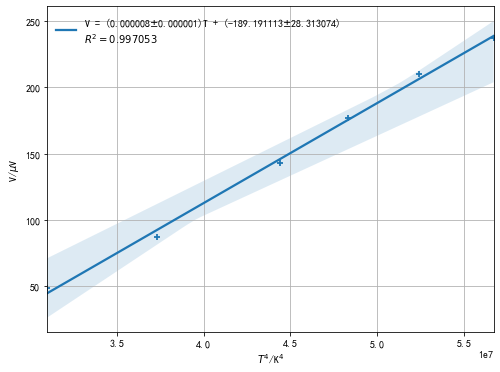

In [146]:
EDA(RT,(T+273.15)**3).LinearfitPlot(xname='T',yname='V',xlabel='$T^4$/K$^4$',ylabel='V/$\mu$V',FileAdress=r'E:\Latex\FE 3\CC1\P-T1.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$T^4$/K$^4$', ylabel='V/$\\mu$V'>,
 array([ 3.65030938e-11, -6.18128211e+01]),
 array([1.12962960e-12, 6.87900647e+00]),
 array([ 0.76976015, 10.59429114,  2.11018379, 25.74331226, 17.37439429,
        43.06571402]),
 0.9961839652445796)

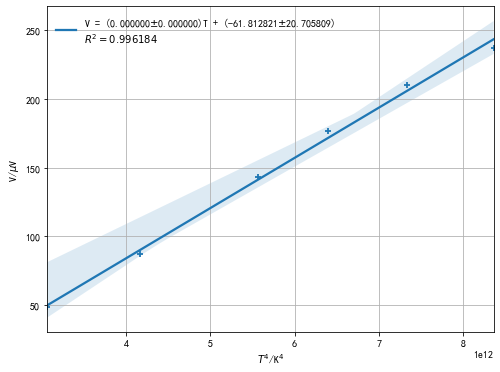

In [147]:
EDA(RT,(T+273.15)**5).LinearfitPlot(xname='T',yname='V',xlabel='$T^4$/K$^4$',ylabel='V/$\mu$V',FileAdress=r'E:\Latex\FE 3\CC1\P-T2.png')

In [159]:
2.62534390e-10/(np.pi*(0.025**2))

1.3370766688036944e-07

In [161]:
(1.92171998e+00/2.62534390e-10)**(1/4)

292.5000712393265

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$\\sin^2(\\arctan(R/s))$', ylabel='P/$\\mu$V'>,
 array([8706.90836454,  156.62568441]),
 array([449.35749929,  78.47262586]),
 array([ 14722.56970007,  13967.31802564,  12796.00783923,  12606.28918825,
         12321.50056222,  10979.68715731,  10469.74924287,   8581.60624425,
          6283.54755239,   6445.14968219,   5274.05379459,   4074.7119071 ,
          2769.01753352,   1929.30797676,    894.47688923,  18863.93761982,
        134124.66026237, 252518.34199834, 405161.20155562, 182513.16623528,
        691426.11480591]),
 0.951830804040374)

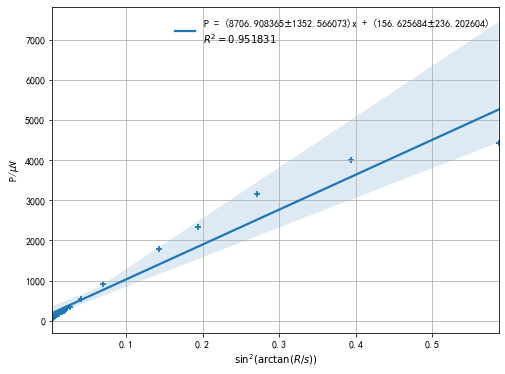

In [208]:
EDA(RS,np.sin(np.arctan(25/S))**2).LinearfitPlot(yname='P',xlabel='$\\sin^2(\\arctan(R/s))$',ylabel='P/$\mu$V',FileAdress=r'E:\Latex\FE 3\CC1\P-s2.png')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$s^{-2}$/mm$^{-2}$', ylabel='P/$\\mu$V'>,
 array([7.55700659e+06, 1.94235053e+01]),
 array([5.74360497e+04, 1.68744058e+00]),
 array([6.65886341e+00, 6.70219437e+00, 1.04761766e+01, 1.36129765e+00,
        1.27478456e+00, 4.11450428e-01, 6.42630044e+00, 2.25606082e-02,
        1.24362454e+01, 1.27635618e+01, 9.57482163e+00, 8.19232925e+00,
        3.85508780e+00, 3.43000702e+01, 5.50976097e+01]),
 0.9992496103014206)

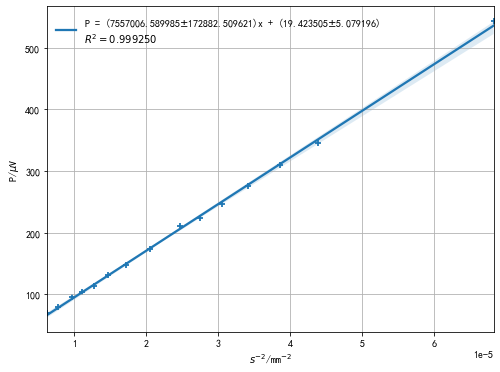

In [209]:
S1=np.array([[401,361,321,301,281,261,241,221,201,191,181,171,161,151,121]])*1.0
RS1=np.array([[69,80,96,104,114,131,147,174,210,223,247,275,309,345,543]])
EDA(RS1,1/S1**2).LinearfitPlot(yname='P',xlabel='$s^{-2}$/mm$^{-2}$',ylabel='P/$\mu$V',FileAdress=r'E:\Latex\FE 3\CC1\P-s3.png')

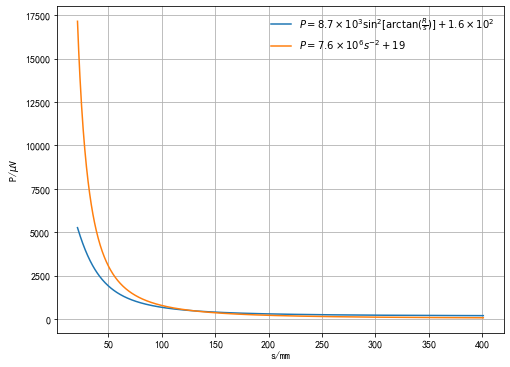

In [220]:
def funcTs1(s):
    c=8706.90836454
    d=156.62568441
    return c*np.sin(np.arctan(25/s))**2+d
def funcTs2(s):
    c=7.55700659e+06
    d=1.94235053e+01
    return c*s**(-2)+d
s=np.linspace(21,401,1000)
y1=funcTs1(s)
y2=funcTs2(s)
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(s,y1,label='$P=8.7\\times10^3\sin ^{2}[\\arctan(\\frac{R}{s})]+1.6\\times10^2$')
ax.plot(s,y2,label='$P=7.6\\times 10^6s^{-2}+19$')
ax.grid()
ax.set_xlabel('s/mm')
ax.set_ylabel('P/$\mu$V')
ax.legend(frameon=False)

In [223]:
(210+209+209)/3

209.33333333333334

In [222]:
(60+58+59)/3

59.0

In [224]:
59/((210+209+209)/3)

0.2818471337579618

In [225]:
43/((210+209+209)/3)

0.20541401273885349